<a href="https://colab.research.google.com/github/wahid028/CryptoCurrency-Price-prediction_Kaggle/blob/main/ARIMA_model_g_research_crypto_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Connecting colab with kaggle using kaggle API**

In [1]:
#install kaggle
!pip install -q kaggle

In [2]:
#upload the kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"learn2know","key":"ef7c1f3683ce0590f0cee38b88d74d21"}'}

In [3]:
#create a kaggle directory
!mkdir ~/.kaggle

In [4]:
#copy the kaggle.json to kaggle directory
!cp kaggle.json ~/.kaggle/

In [5]:
#permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
#list all the available dataset in kaggle
!kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           3282        113  1.0              
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39          11173       1474  0.9375           
paradisejoy/top-hits-spotify-from-20002019                            Top Hits Spotify from 2000-2019                   94KB  2022-04-26 17:30:03           3099         84  1.0              
muratkokludataset/rice-image-dataset         

## **Get g-research-crypto-forecasting dataset**

In [7]:
!kaggle competitions download -c g-research-crypto-forecasting

 99% 1.13G/1.13G [00:07<00:00, 162MB/s]
100% 1.13G/1.13G [00:07<00:00, 164MB/s]


In [8]:
#unzip the target file
!unzip g-research-crypto-forecasting.zip

Archive:  g-research-crypto-forecasting.zip
  inflating: asset_details.csv       
  inflating: example_sample_submission.csv  
  inflating: example_test.csv        
  inflating: gresearch_crypto/__init__.py  
  inflating: gresearch_crypto/competition.cpython-37m-x86_64-linux-gnu.so  
  inflating: supplemental_train.csv  
  inflating: train.csv               


In [10]:
# Custom G-Research python module needed
import gresearch_crypto

# Pandas for data manipulation
import pandas as pd
import numpy as np

# module provides a portable way of using operating system dependent functionality
import os 

 # Importing pyplot interface using matplotlib
import matplotlib.pyplot as plt 

# Importing seaborn library for interactive visualization
import seaborn as sns 

# Importing WordCloud for text data visualization
from wordcloud import WordCloud

# Importing matplotlib for plots
import matplotlib as mpl

#Importing datetime for using datetime
from datetime import datetime

#Importing plotly Express for visualization
import plotly.express as px

# Importing statsmodel for statistical methods
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

#Importing for customizing properties in matplotlib
from pylab import rcParams

import itertools

import warnings
warnings.filterwarnings('ignore')

In [11]:
# Display files available in this competition folder
for dirname, _, filenames in os.walk('../content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../content/asset_details.csv
../content/kaggle.json
../content/example_sample_submission.csv
../content/train.csv
../content/example_test.csv
../content/supplemental_train.csv
../content/g-research-crypto-forecasting.zip
../content/.config/active_config
../content/.config/.last_opt_in_prompt.yaml
../content/.config/config_sentinel
../content/.config/.last_update_check.json
../content/.config/gce
../content/.config/.last_survey_prompt.yaml
../content/.config/logs/2022.05.17/13.38.09.439256.log
../content/.config/logs/2022.05.17/13.39.22.346555.log
../content/.config/logs/2022.05.17/13.39.01.950417.log
../content/.config/logs/2022.05.17/13.38.32.171487.log
../content/.config/logs/2022.05.17/13.39.23.151362.log
../content/.config/logs/2022.05.17/13.38.52.565105.log
../content/.config/configurations/config_default
../content/gresearch_crypto/__init__.py
../content/gresearch_crypto/competition.cpython-37m-x86_64-linux-gnu.so
../content/gresearch_crypto/__pycache__/__init__.cpython-37.pyc
..

**Data Definition/Description**

In [12]:
# load training data
train_df = pd.read_csv('../content/train.csv', low_memory=False)

# load asset details data
asset_details_df = pd.read_csv('../content/asset_details.csv', low_memory=False)

# load example test data
test_df = pd.read_csv('../content/example_test.csv', low_memory=False)

In [13]:
# print descriptive statistics for train dataset
train_df.describe(include='all').round(1)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
count,2.423681e+07,24236806.0,24236806.0,24236806.0,24236806.0,24236806.0,24236806.0,24236806.0,24236797.0,23486468.0
mean,1.577120e+09,6.3,286.5,1432.6,1436.4,1429.6,1432.6,286853.0,NaN,0.0
std,3.323350e+07,4.1,867.4,6029.6,6039.5,6020.3,6029.6,2433934.6,NaN,0.0
min,1.514765e+09,0.0,1.0,0.0,0.0,0.0,0.0,-0.4,-inf,-0.5
25%,1.549011e+09,3.0,19.0,0.3,0.3,0.3,0.3,141.1,0.3,-0.0
50%,1.578372e+09,6.0,64.0,14.3,14.3,14.3,14.3,1295.4,14.3,-0.0
75%,1.606198e+09,9.0,221.0,228.9,229.3,228.4,228.9,27297.6,228.9,0.0
max,1.632182e+09,13.0,165016.0,64805.9,64900.0,64670.5,64808.5,759755403.1,inf,1.0


In [14]:
# merge dataframe using Asset_ID as key
gresearch_crypto_df = pd.merge(train_df,asset_details_df,on=['Asset_ID'])

In [15]:
#Handle missing value, will drop them
# drop missing value from dataframe
gresearch_crypto_df.dropna(axis=0, inplace=True)

In [16]:
# print summary of dataframe
gresearch_crypto_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486465 entries, 0 to 24236789
Data columns (total 12 columns):
 #   Column      Non-Null Count     Dtype  
---  ------      --------------     -----  
 0   timestamp   23486465 non-null  int64  
 1   Asset_ID    23486465 non-null  int64  
 2   Count       23486465 non-null  float64
 3   Open        23486465 non-null  float64
 4   High        23486465 non-null  float64
 5   Low         23486465 non-null  float64
 6   Close       23486465 non-null  float64
 7   Volume      23486465 non-null  float64
 8   VWAP        23486465 non-null  float64
 9   Target      23486465 non-null  float64
 10  Weight      23486465 non-null  float64
 11  Asset_Name  23486465 non-null  object 
dtypes: float64(9), int64(2), object(1)
memory usage: 2.3+ GB


**Model Building/Prediction**

In [17]:
# convert timestamp to Datetime for further analysis
gresearch_crypto_df['Datetime'] = pd.to_datetime(gresearch_crypto_df['timestamp'], unit='s')

In [18]:
# Lookup asset name and return asset series
def asset_lookup (asset_name):
    # check for Asset_Name
    crypto_asset =gresearch_crypto_df.loc[gresearch_crypto_df['Asset_Name'] == asset_name]
    # drop all other columns as of now
    crypto_asset_df= crypto_asset.drop(columns=['timestamp','Asset_ID','Count','Open','High','Low','Close','Volume','VWAP','Weight','Asset_Name'], axis=1)
    # sort by Datetime and set index
    crypto_asset_df = crypto_asset_df.sort_values('Datetime')
    crypto_asset_df = crypto_asset_df.groupby('Datetime')['Target'].sum().reset_index()
    crypto_asset_df = crypto_asset_df.set_index('Datetime')
    # group the data by business day
    return crypto_asset_df['Target'].resample('B').mean()

In [19]:
# check for stationarity using ADF Test for a given asset series
def asset_stationarity (asset_series):
    result = adfuller(asset_series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
     print('\t%s: %.3f' % (key, value))

In [20]:
# visualization for trend,seasonality and residual for a given asset series
def asset_decompose (asset_series):
    rcParams['figure.figsize'] = 18, 8
    decomposition = sm.tsa.seasonal_decompose(asset_series, model='additive')
    fig = decomposition.plot()
    plt.show()

## **Lets explore ARIMA model for Bitcoin**

In [21]:
# create series for Asset_Name Bitcoin
bitcoin = asset_lookup('Bitcoin')
bitcoin.isna().sum()

0

In [22]:
# check asset stationarity
asset_stationarity (bitcoin)

ADF Statistic: -8.528180
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


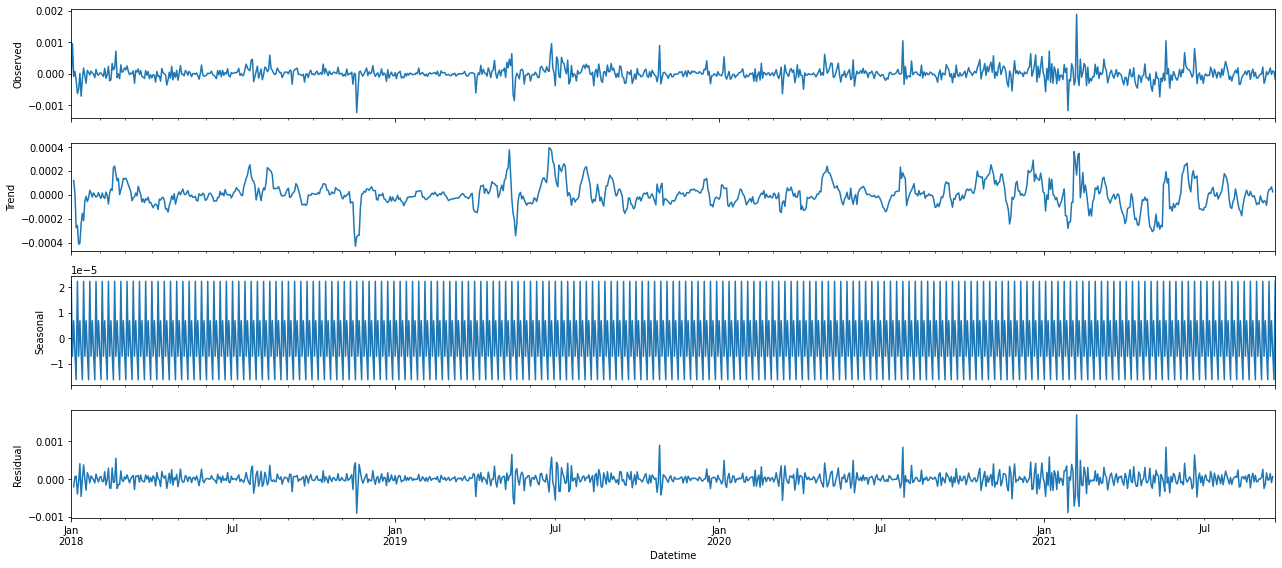

In [23]:
# visualize trend, seasonality and residual
asset_decompose(bitcoin)

In [24]:
# ARIMA models are denoted by p,d,q which are seasonality, trend and residual (noise)
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [25]:
# search for best parameter combination for ARIMA model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(bitcoin,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-13672.505240270435
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-13542.039521078706
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-12849.171169204032
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-13209.373454160841
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-13554.975950339558
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-13539.917697634184
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-12971.832203378075
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-13204.11978235617
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-13682.89042817605
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-13530.561751837888
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-12844.177170274965
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-13206.713557747738
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-13558.292842033794
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-13528.815955917074
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-12973.777385897258
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-13193.207168315177
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-13080.356017006721
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - 

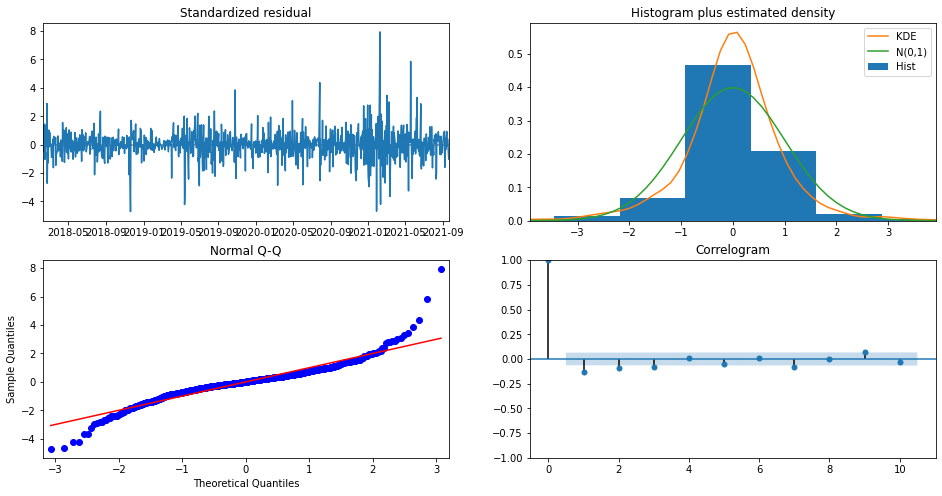

In [26]:
# model diagnostics to check for errors
results.plot_diagnostics(figsize=(16, 8))
plt.show()

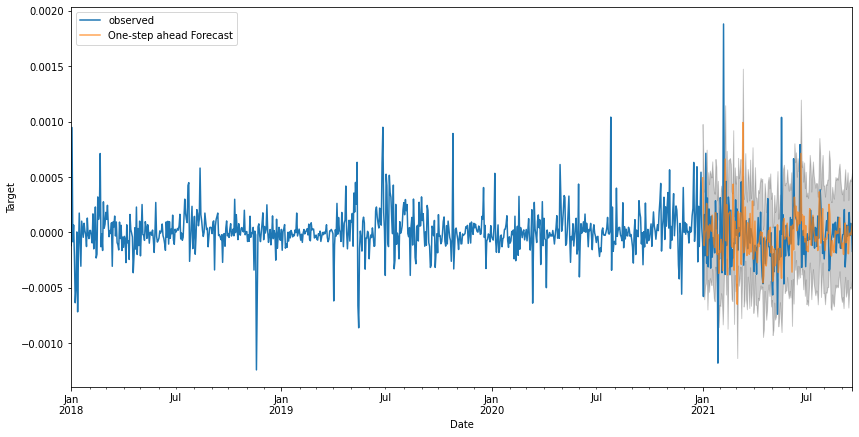

In [27]:
# validate forecast
pred = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = bitcoin['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Target')
plt.legend()
plt.show()

In [28]:
y_forecasted = pred.predicted_mean
y_truth = bitcoin['2021-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.0


In [29]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.0


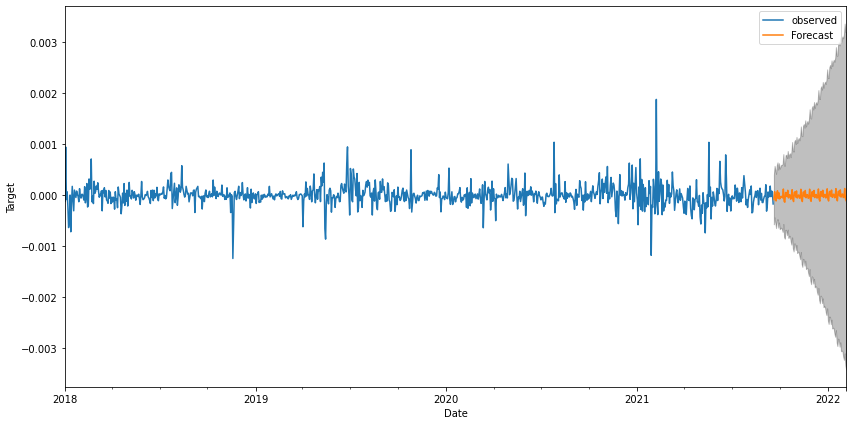

In [30]:
# visualization of forecast
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = bitcoin.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Target')
plt.legend()
plt.show()

## **Lets explore ARIMA model for Ethereum**

In [31]:
# create series for Asset_Name Ethereum
ethereum = asset_lookup('Ethereum')
ethereum.isna().sum()

0

In [32]:
# check asset stationarity
asset_stationarity (ethereum)

ADF Statistic: -5.936924
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


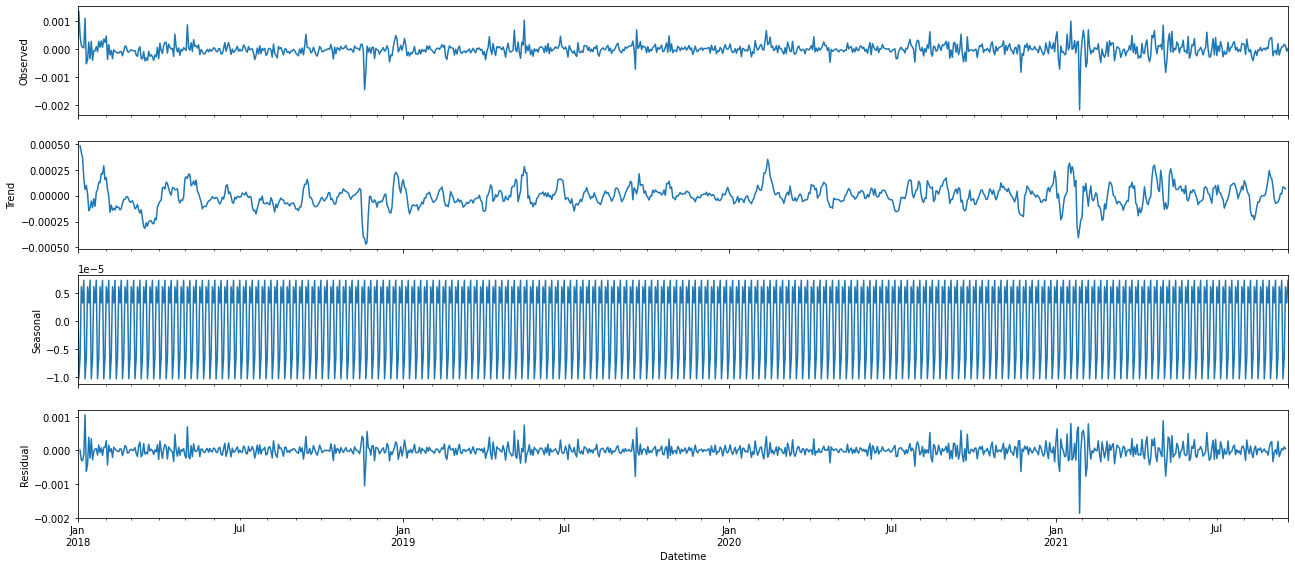

In [33]:
# visualize trend, seasonality and residual
asset_decompose(ethereum)

In [34]:
# search for best parameter combination for ARIMA model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ethereum,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-13561.818551954602
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-13467.611633509801
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-12782.225090222606
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-13101.839968734123
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-13479.18689282252
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-13461.397599114021
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-12882.611858424483
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-13123.122856130045
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-13589.203142665046
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-13459.762233605114
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-12794.63303160454
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-13486.35892089249
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-13456.111710006215
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-12890.553377158907
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-13113.729539302836
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-12985.691898513258
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-12884.721206

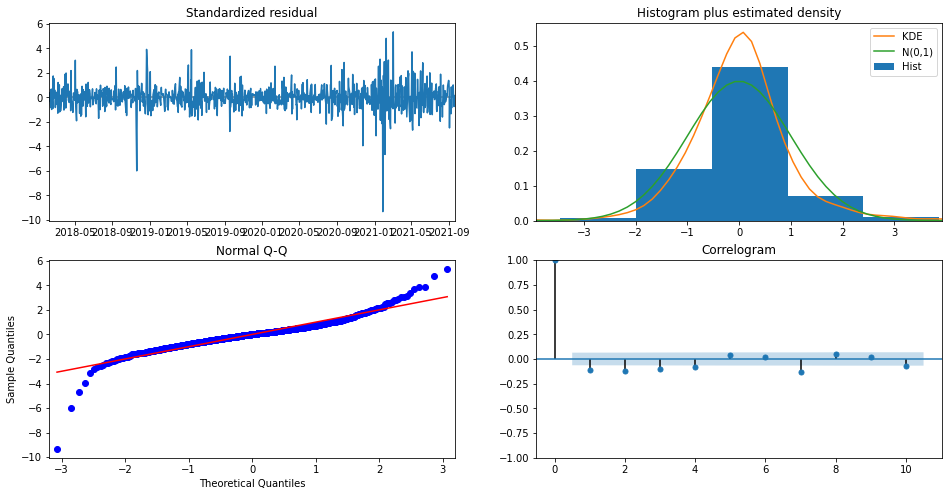

In [35]:
# model diagnostics to check for errors
results.plot_diagnostics(figsize=(16, 8))
plt.show()

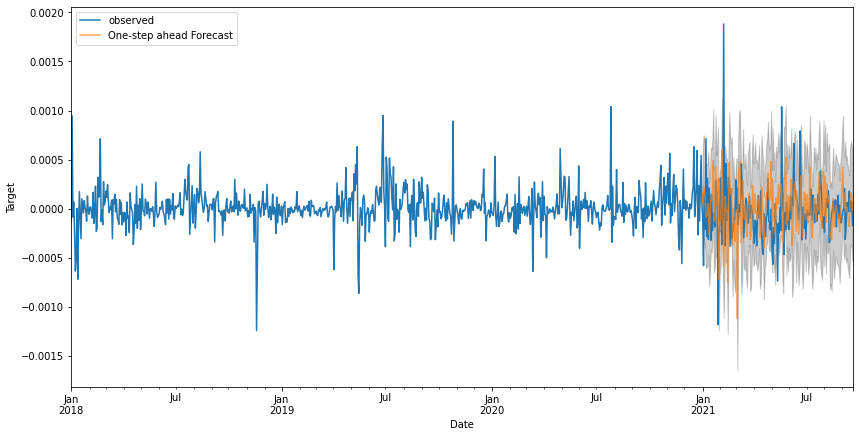

In [36]:
# validate forecast
pred = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = bitcoin['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Target')
plt.legend()
plt.show()

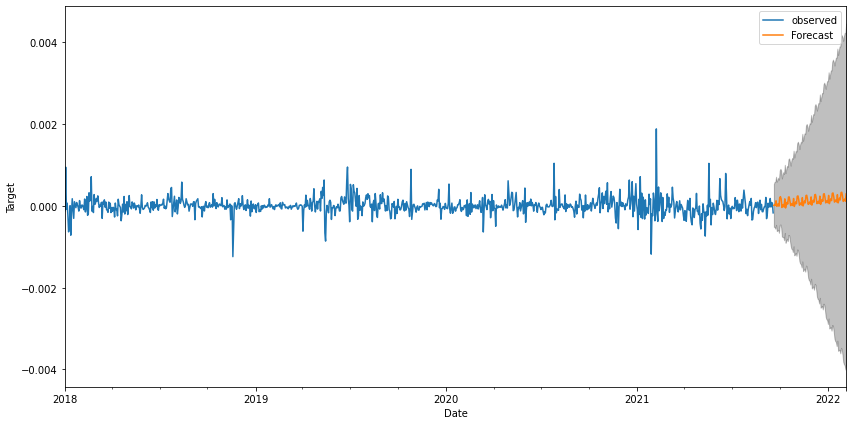

In [37]:
# visualization of forecast
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = bitcoin.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Target')
plt.legend()
plt.show()

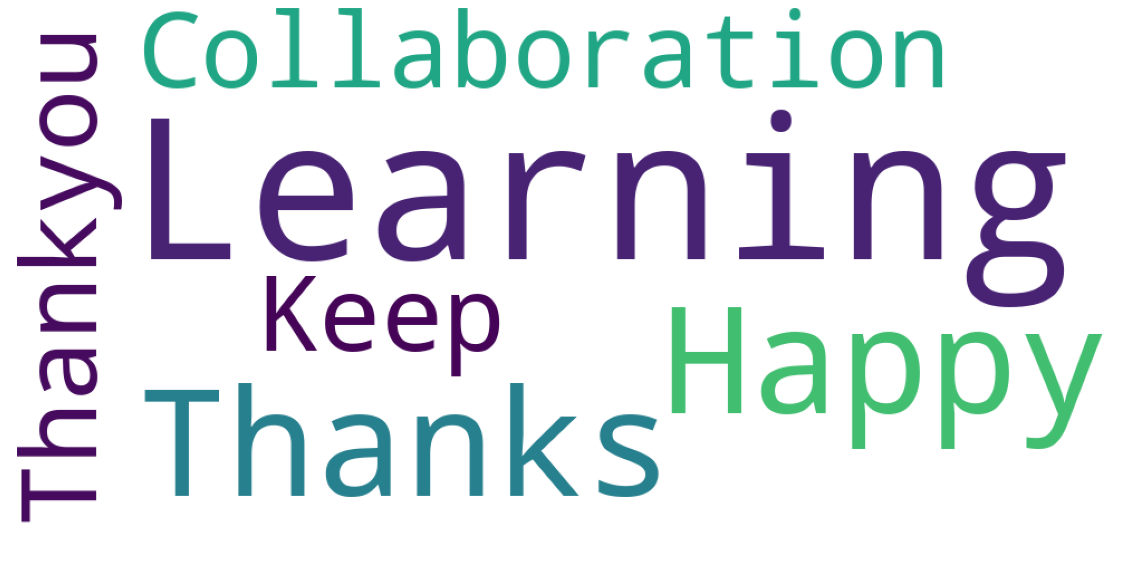

In [39]:
thank_you_str="Thanks,Happy Learning,Collaboration,Thankyou,Keep Learning"
# create WordCloud with converted string
wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='white', collocations=True).generate(thank_you_str)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()